### Imports

In [10]:
import cv2
from matplotlib import pyplot as plt
from time import time

### Recibimiento de Imagen

Se supone que debo recibir imágenes de una transmisión (porque usaremos cámaras, no?). El tema es que no sabría como conseguir dichos frames sin saber como funciona la cámara.

Para testear funcionalidad, se usará la webcam de la persona que use este código, si es que tiene.

In [29]:
#Capturas de video

#Este es para usar un video ya descargado y listo.
#Este código no tiene dicho video, solo metelo en el directorio.
#cap = cv2.VideoCapture('varios/video.mp4')

#Esto es para una transmisión en tiempo real cualquiera (que es muy posible que usemos).
#cap = cv2.VideoCapture('rtsp://url.to.stream/media.amqp')

# Para webcam (conste que la mía es de 30fps, eso puede ser importante en el código).
cap = cv2.VideoCapture(0)
count = 0

"""
success,image = cap.read()

while success:
  cv2.imwrite("frames/frame%d.jpg" % count, image) 
  #cv2.imwrite("livestream/frame%d.jpg" % count, image)     

  success,image = cap.read()
  print('Read a new frame: ', success)
  count += 1
"""

previous = time()
delta = 0

while cap.isOpened():
    ret, frame = cap.read()

    current = time()
    delta += current - previous
    previous = current

    #Si es que funciona...
    if ret:

        # Creación imagen, delta > x implica que se debe obtener cada x segundos
        # Asumiré que capturaré un frame cada 5 segundos
        if delta > 5:
            lastimg = cv2.imwrite('testingwebcam/frame{:d}.jpg'.format(count), frame)
            lastimg2 = cv2.imwrite('imagenactual/frame.jpg', frame)
            
            # Para webcam: Cada 30, es un segundo.
            #count += 30
            count = count + 1
            cap.set(cv2.CAP_PROP_POS_FRAMES, count)
            delta = 0        

    #Creo que es imposible que llegue acá si es un livestream.
    else:
        cap.release()
        break


KeyboardInterrupt: 

## CIERRA TU CÁMARA, ESTA COSA SE HIZO PARA CORRER ETERNAMENTE
Es el comportamiento esperado para este proyecto.

También corta la celda donde se ejecuta, claro.

In [30]:
#Ejecutar celda si se quiere terminar.
cap.release()

### Lectura de imágenes de OpenCV

Deberían usarse varias cámaras, por lo que quizá sea buena idea un array.

Tendrán RGB incorrecto, pero no es importante. (Al YOLO no le importa que sea un auto rojo o verde, sino que sea un auto nomás)

... O puedo ser un gil y en realidad sí importa.

In [8]:
imagenes = []

img = cv2.imread('varios/Z7HeRxU.png', cv2.IMREAD_UNCHANGED)
img2 = cv2.imread('varios/grande.jpg', cv2.IMREAD_UNCHANGED)

imagenes.append(img)
imagenes.append(img2)

libpng warning: iCCP: known incorrect sRGB profile


<function matplotlib.pyplot.show(close=None, block=None)>

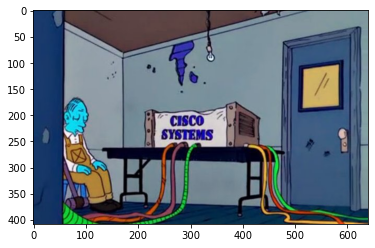

In [15]:
#Para graficar:

%matplotlib inline

plt.imshow(imagenes[1])
plt.show

### Resize
Porque se debe usar una resolución pequeña para darle un empujoncito al YOLO.

In [9]:
#Reajustar tamaño de frames

#Se usará un 16:9?
dim = (640, 360)

#O un 4:3?
#dim = (640, 480)

imgnueva = cv2.resize(imagenes[0], dsize=dim, interpolation = cv2.INTER_AREA)
imgnueva2 = cv2.resize(imagenes[1], dsize=dim, interpolation = cv2.INTER_AREA)

Fijarse en los números de la imagen, con eso podrían saber más o menos las dimensiones.

<function matplotlib.pyplot.show(close=None, block=None)>

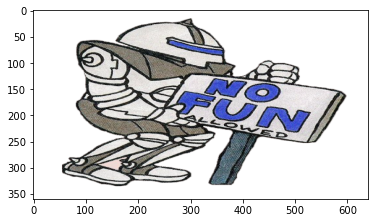

In [10]:
%matplotlib inline

plt.imshow(imgnueva)
plt.show

Este segundo plot es para ver si el array de imágenes funciona aunque sean formatos diferentes.

<function matplotlib.pyplot.show(close=None, block=None)>

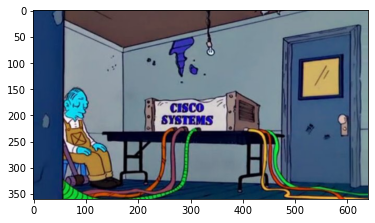

In [11]:
%matplotlib inline

plt.imshow(imgnueva2)
plt.show

### Recortar
Acá, el punto es que se recortan las imagenes obtenidas por las cámaras, ya que es posible que se repitan estacionamientos y eso causaría conflictos.
Los pixeles deben ser definidos según las dimensiones, por lo que hay que tener cuidado.

Este es el apartado de extracción de frames.

In [13]:
cropeada = imgnueva[50:200, 50:100]

cv2.imwrite('cropped/1.jpg',cropeada)

True

<function matplotlib.pyplot.show(close=None, block=None)>

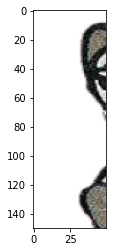

In [7]:
%matplotlib inline

plt.imshow(cropeada)
plt.show

## Ahora deberían estar listas la imágenes para el YOLO.